# Structural keys task

Jako obvyklé, začneme načtenním souborů. Ligandy z datasetu Cytochromu jsou v promenné <b>cyto_ligands</b>, a ligandy Drugbanku leží v <b>drugs</b>

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import seaborn as sns
import pandas as pd
import time
from itertools import chain
import csv

d = rdMolDraw2D.MolDraw2DSVG(300,300)

pains = []
with open('p_l15.txt', 'r') as f, open('p_m150.txt', 'r') as p, open('CHEMBL26-chembl_26_activity.csv', 'r') as csvfile:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags
    inp = csv.DictReader(csvfile, delimiter=";")
    cyto_ligands = [Chem.MolFromSmiles(el['Smiles']) for el in inp if not el['Smiles'] == None]

suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if not m == None]


Bad key "text.kerning_factor" on line 4 in
/Users/hanchary/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
RDKit ERROR: [17:48:34] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [17:48:34] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [17:48:34] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [17:48:34] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [17:48:34] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [17:48:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:48:34] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [17:48:34] ERROR: Can't kekulize mol.  Unkekulized 

RDKit ERROR: [17:48:35] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [17:48:35] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [17:48:35] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [17:48:35] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [17:48:35] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [17:48:35] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [17:48:35] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [17:48:35] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [17:48:35] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [17:48:35] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [17:48:35] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [17:48:35] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:48:36] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [17:48:36] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [17:48:36] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [17:48:37] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [17:48:37] ERROR: Could not sanitize molecule ending on line 1151592


Provedeme stejne operace pro strukturni kliče, jake v cviku, jed trochu rozšiřime počet patternů, a take vizualizujeme jejich počet pro datasety Cytochromu a Drugbanku. Udělamé 2 funkci. <b>struckKeys()</b> jako argument přijimá seznam ligandů, a na vystupu má seznám kličů pro každy ligand a take seznam nazev hledaných patternů (potřebujeme pro vizualizací). Funkce <b>structKeysVisualize()</b> vizualizuje vysledky.

In [2]:
def structKeys(mol_list):
    pattern_list = { 'ethanol' : Chem.MolFromSmarts('CCO'),
                   'propanol': Chem.MolFromSmarts('CCCO'),
                   'cooh' : Chem.MolFromSmarts('C(=O)[O;h1]'),
                   'salicylic_acid' :   Chem.MolFromSmarts('c1ccc(c(c1)C(=O)O)O'),
                   'pyridine' : Chem.MolFromSmiles('c1ccncc1'),
                   'purine': Chem.MolFromSmiles('c1c2c(nc[nH]2)ncn1'),
                   'aniline' : Chem.MolFromSmiles('Nc1ccccc1'),
                   'sulfonic_acid': Chem.MolFromSmiles('S(=O)(=O)O'),
                   'phosphoric_acid': Chem.MolFromSmiles('OP(=O)(O)O'),
                   'furan' : Chem.MolFromSmiles('c1ccoc1'),
                   'pyrole' : Chem.MolFromSmiles('N1C=CC=C1')
                    }
    mol_ligands_keys = [[m.HasSubstructMatch(pattern_list[name]) for name in pattern_list] for m in mol_list]
    return mol_ligands_keys, list(pattern_list.keys())

def structKeysVisualize(keys_list, pattern_list, dataset_name):
    group_count = pd.DataFrame(data = { 'group_name' : pattern_list,
                                        'values' : pd.DataFrame(keys_list). sum()
                                        })
    sns.set(rc={'figure.figsize':(11.7, 7)})
    with sns.axes_style("darkgrid"):
        p = sns.barplot(x='group_name', y='values', data=group_count)
        p.set_title(f"Counts of structural keys present in {dataset_name} ligand dataset")
        p.set_ylabel("Count of group matches")
        for pat in p.patches:
            p.text(pat.get_x() + pat.get_width()/2., pat.get_height(), '%d' % int(pat.get_height()), 
                  fontsize=10, ha='center', va='bottom')
            p.set_xticklabels(p.get_xticklabels(), rotation=30)


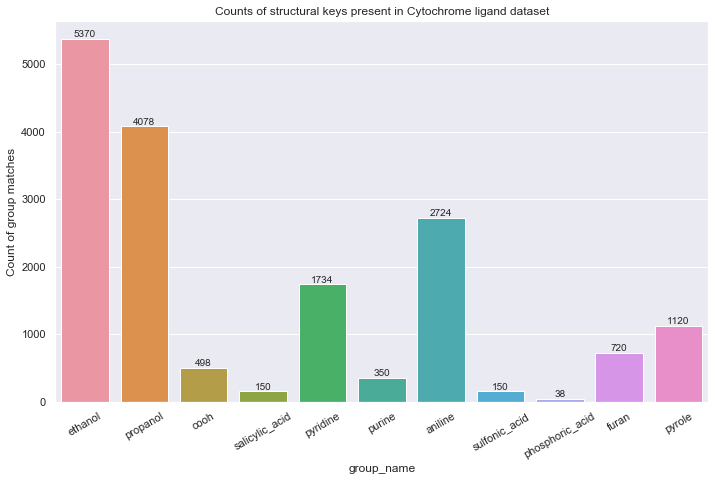

In [3]:
cyto_ligands_keys, cyto_pattern_list = structKeys(cyto_ligands)
structKeysVisualize(cyto_ligands_keys, cyto_pattern_list, "Cytochrome")

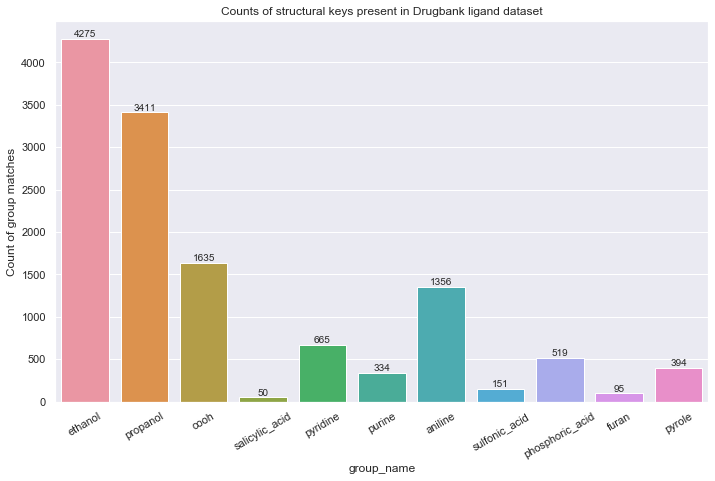

In [4]:
drugs_keys, drugs_pattern = structKeys(drugs)
structKeysVisualize(drugs_keys, drugs_pattern, 'Drugbank')

Po ukončeni vidime, že celkem všichny skupiny jsou přitomny s dvou datasetech v přiblizné podobnych poměrech, kromě COOH, kyseliny fosforečné a furanu. Ligandy Cytochromu mají meně COOH a kyseliny fosforečné a vic furanu, když v Drugbanku naopak vice COOH a kyseliny fosforečné a meně furanu. Dale provedeme analyzu MACCS kličů.


In [5]:
def maccsVis(maccs_list, dataset_name):
    maccs_list_sums = [0]*maccs_list[0].GetNumBits() # a list of zeros of a given length
    labs = list(range(maccs_list[0].GetNumBits()))
    for key in maccs_list:
        for onbit in key.GetOnBits():
            maccs_list_sums[onbit] += 1

    maccs_count = pd.DataFrame(data = { 'macc_#' : labs,
                                        'values' : maccs_list_sums
                                        })
  
    sns.set(rc={'figure.figsize':(22, 7)})
    with sns.axes_style("darkgrid"):
        p = sns.barplot(x='macc_#', y='values', data=maccs_count)
        p.set_title(f"Counts of MACCS keys present in {dataset_name} ligand dataset")
        p.set_ylabel("Count of group matches")     
        p.set_xticklabels(p.get_xticklabels(), rotation=90)
    return maccs_list_sums

cyto_maccs = [MACCSkeys.GenMACCSKeys(m) for m in cyto_ligands]
drug_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugs]

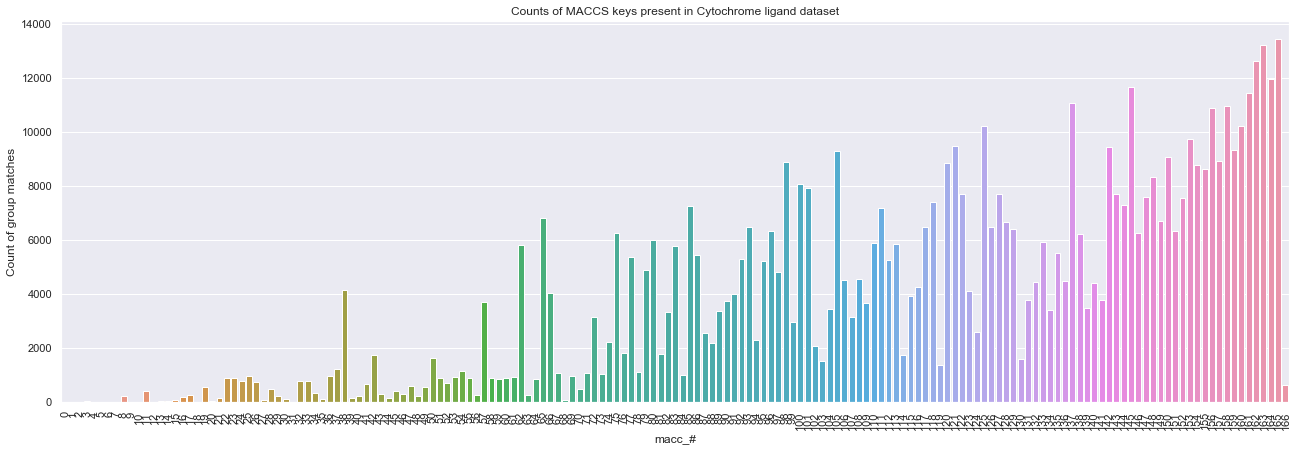

In [6]:
cyto_maccs_count = maccsVis(cyto_maccs, 'Cytochrome')

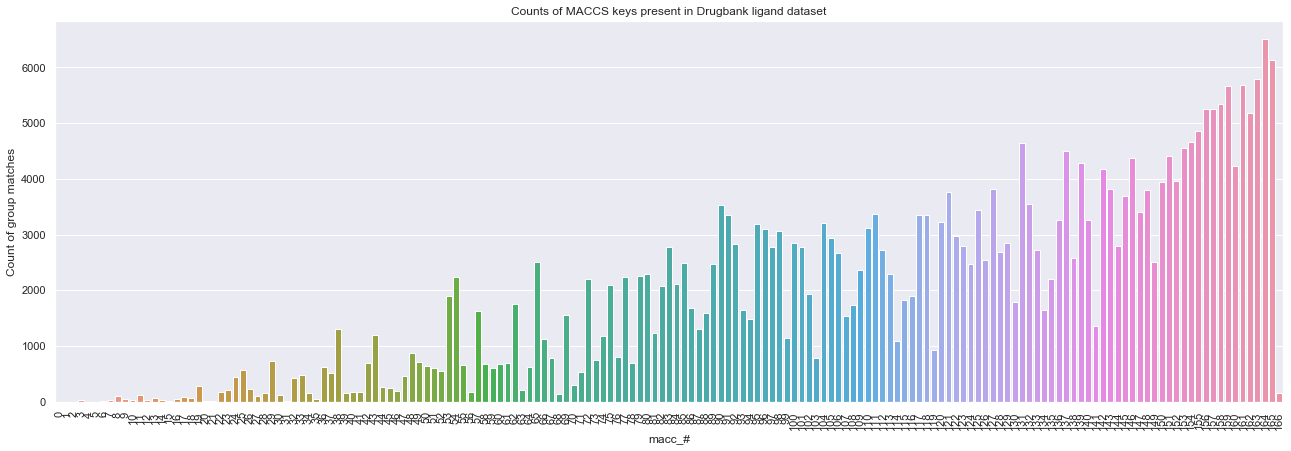

In [7]:
drug_maccs_count = maccsVis(drug_maccs, 'Drugbank')

Ted' provedeme škalovaní počtů MACCS kličů a vizualizaci.

The most abundant MAACS keys in Drugbank dataset:
(131, -0.37553371867411917)
(139, -0.3493907601257921)
(54, -0.23220743690220208)
(90, -0.2236900551051863)
(84, -0.22287973545370565)
(104, -0.2010672710087676)

The most abundant MAACS keys in Cytochrome dataset


[(98, 0.22096301189277928),
 (93, 0.2414454998581186),
 (125, 0.26328180629386666),
 (105, 0.2657494831463),
 (145, 0.33374400700449347)]

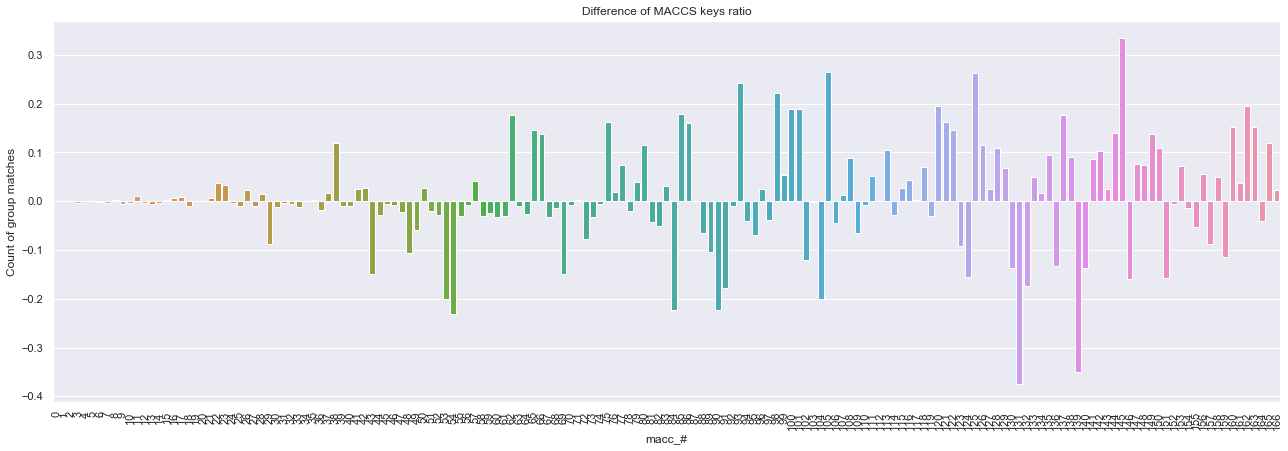

In [8]:
cyto_maccs_count_scaled = [x/len(cyto_maccs) for x in cyto_maccs_count]
drug_maccs_count_scaled = [x/len(drug_maccs) for x in drug_maccs_count]
cyto_drugbank_differences = [(i, a_b[0] - a_b[1]) for i, a_b in enumerate(zip(cyto_maccs_count_scaled, drug_maccs_count_scaled))]
cyto_drugbank_differences.sort(key=lambda x: x[1])

maccs_diff_count = pd.DataFrame(data = { 'macc_#' : [x[0] for x in cyto_drugbank_differences],
                                         'values' : [x[1] for x in cyto_drugbank_differences]
                                        })

sns.set(rc={'figure.figsize':(22, 7)})
with sns.axes_style("darkgrid"):
    p = sns.barplot(x='macc_#', y='values', data=maccs_diff_count)
    p.set_title(f"Difference of MACCS keys ratio")
    p.set_ylabel("Count of group matches")     
    p.set_xticklabels(p.get_xticklabels(), rotation=90)

print("The most abundant MAACS keys in Drugbank dataset:")
for el in cyto_drugbank_differences[:6]:
    print(el)
print("\nThe most abundant MAACS keys in Cytochrome dataset")
cyto_drugbank_differences[-5:]

Vidimé, že nejhojnější (vice než 0.2 na grafu) MAACS kličу v datasetu Cytochromu jsou čisla 145, 105, 125, 93, 98. Jsou to:
- '\*1\~\*\~\*\~\*\~\*\~\*\~1' (6M ring)
- '\*\@\*\(\@\*\)\@\*'
- '?' (Aromatic Ring > 1)
- '[!#6;!#1]\~[CH3]' (# QCH3)
- '[!#6;!#1]1\~\*\~\*\~\*\~\*\~\*\~1', (# QAAAAA@1).

Pro Drugbank dataset jsou to kličí 131, 139, 54, 90, 84, 104 (meně než -0.2 na grafu):
- '[!#6;!#1]\~[#8]', # QO
- '[O;!H0]', # OH
- '[!#6;!#1;!H0]\~\*\~\*\~[!#6;!#1;!H0]', # QHAAQH
- '[$([!#6;!#1;!H0]~*~*~[CH2]~*),$([!#6;!#1;!H0;R]1@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~[R]1@[R]@[CH2;R]1)]', # QHAACH2A
- '[NH2]', #NH2
- '[!#6;!#1;!H0]\~\*\~[CH2]\~\*', # QHACH2A

Také zkusil jsem použit te MACCS keys pro hledani PAINS ve svem datasetu. Bohužel, nepřišel nikčemu lepšimu, než brute-force algotitm. Naopak, trohu shoršil jsem algoritm tim, že zarovnaval bitmapy latek (bylo přiblizně 40 sekund, ted' to trvá 90-120 sekund). Delam to zarovnaní ručne (pomoci funkci <b>compareBits()</b>), protože nenašél žadnou metodu pro tuto ulohu. Na řadkach před funkci <b>compareBits()</b> provadime filtrovaní seznamu PAINS. Nevim přesne, k čemu to, ale nemohl delat některe věci, ale pak pomohli mě metoda <b>UpdatePropertyCache()</b> a <b>FastFindRings()</b>.

In [9]:
from rdkit.Chem.rdmolops import FastFindRings
problem_pains = []
new_pain = []
for i, el in enumerate(pains):
    try:
        mol = el[0]
        mol.UpdatePropertyCache()
        FastFindRings(mol)
        new_pain.append([mol, el[1]])
    except:
        problem_pains.append(i)

pains_maccs = [MACCSkeys.GenMACCSKeys(m[0]) for m in new_pain]

def compareBits(list1, list2, on_list):
    for ind in on_list: 
        if list1[ind] == "1" and list1[ind] == list2[ind]:
              return True
    return False

RDKit ERROR: [17:48:37] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [17:49:53] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [17:49:53] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [17:49:53] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [17:49:53] Explicit valence for atom # 0 C, 5, is greater than permitted
RDKit ERROR: [17:49:53] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [17:49:53] Explicit valence for atom # 23 O, 3, is greater than permitted


In [10]:
cyto_with_pains = []
start = time.time()
for ind_c, cyto in enumerate(cyto_maccs):
    check = False
    for ind_p, pain in enumerate(pains_maccs):
        if compareBits(pain.ToBitString(), cyto.ToBitString(), pain.GetOnBits()):
              if cyto_ligands[ind_c].HasSubstructMatch(pains[ind_p][0]):
                try:
                    cyto_ligands[ind_c].pain_match.append(ind_p)
                except:
                    cyto_ligands[ind_c].pain_match = [ind_p]
                check = True
    if check:
        cyto_with_pains.append(cyto_ligands[ind_c])
end = time.time()
end-start

93.55731320381165